# Why you should never use "jet" colormap

## Compare "viridis" and "jet" with "gray" colormap

Here I create an artificial Gaussian density profile, centering at the origin and having a $\sigma$ of 0.5, and show it with "gray" colormap.

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

# construct a 2D Gaussian
x = np.linspace(-3, 3, 200)
y = x
X, Y = np.meshgrid(x, y)
d = np.sqrt(X*X + Y*Y)
sigma, mu = .5, 0.0
gaus = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
extent = [-3, 3, -3, 3]
plt.imshow(gaus, cmap='gray', extent=extent)
plt.colorbar();

Looks nice, ah? But, black and white are boring, so let us make it colorful. Here is what it looks like with the current default colormap "viridis":

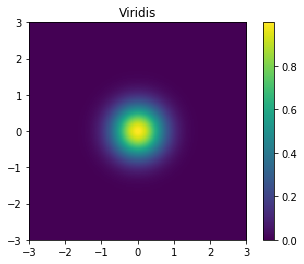

In [2]:
plt.imshow(gaus, cmap='viridis', extent=extent)
plt.title("Viridis")
plt.colorbar();

Looks awsome! We see a bright dot at the center and gradual change to heavier colors toward the edge. Now, let us see what it looks like when plotted with "jet", the default colormap in older versions of matplotlib:

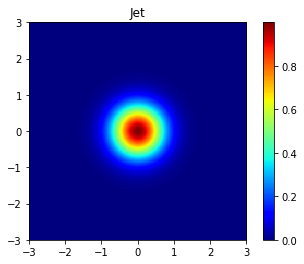

In [3]:
plt.imshow(gaus, cmap='jet', extent=extent)
plt.title("Jet")
plt.colorbar();

It is a disaster! There are artifactual hierarchical layers showing as abrupt changes in color that are not shown in data.

## Define your own color map

Here I create another artificial data: a ring with a radius of 1.

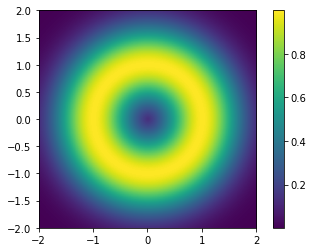

In [4]:
x = np.linspace(-2, 2, 1000)
y = x
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
sigma = 0.5
z = np.exp(-( (r-1)**2 / ( 2.0 * sigma**2 ) ) )
extent = [-2, 2, -2, 2]
plt.imshow(z, cmap='viridis', extent=extent)
plt.colorbar();

Assume we want to focus only on the ring (i.e., say, $z>0.9$) and do not care about other areas, then, we want to redefine the colormap so that all bright colors concentrates on $z>0.9$.

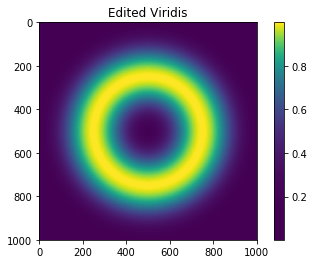

In [5]:
# Define my own colormap
from matplotlib.colors import ListedColormap
base = np.linspace(0, 1, 256)
cmap_viridis = plt.cm.get_cmap('viridis')
colors = [cmap_viridis(i) for i in base]
viridis_copy = ListedColormap(colors)

# Edit the colormap and make it more concentrated at higher values.
# Rescale the data-to-color function with a polynomial function
power = 3
base_mod = np.linspace(0, 1, 256)**power
colors_mod = [cmap_viridis(i) for i in base_mod]
viridis_mod = ListedColormap(colors_mod)

# Show the same image with the edited viridis cmap
plt.figure()
plt.imshow(z, cmap=viridis_mod)
plt.title("Edited Viridis")
plt.colorbar();